In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

class NaiveBayes:
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Estimate class priors
        self.priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.priors[i] = np.mean(y == c)

        # Estimate conditional probabilities
        self.means = np.zeros((n_classes, n_features))
        self.stds = np.zeros((n_classes, n_features))           
        self.theta = np.zeros((n_classes, n_features, 2)) # parameters for discrete features
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[i, :] = np.mean(X_c, axis=0)
            self.stds[i, :] = np.std(X_c, axis=0)
            for j in range(n_features):
                if isinstance(X[0,j], int) or isinstance(X[0,j], float): # continuous feature
                    self.theta[i,j,0] = self.means[i,j]
                    self.theta[i,j,1] = self.stds[i,j]
                else: # discrete feature
                    value_counts = np.bincount(X_c[:,j])
                    self.theta[i,j,0] = (value_counts + 1) / (np.sum(value_counts) + X[:,j].max())
                    self.theta[i,j,1] = None
    
    def predict(self, X):
        n_samples, n_features = X.shape
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                # Compute P(X|y)
                likelihood = 1
                for k in range(n_features):
                    if isinstance(X[i,k], int) or isinstance(X[i,k], float): # continuous feature
                        likelihood *= norm.pdf(X[i,k], self.theta[j,k,0], self.theta[j,k,1])
                    else: # discrete feature
                        likelihood *= self.theta[j,k,X[i,k]]
                # Compute P(y|X)
                probs[j] = self.priors[j] * likelihood
            y_pred[i] = self.classes[np.argmax(probs)]
        return y_pred

# Load the data
train_data = pd.read_csv('TrainData.csv')
test_data = pd.read_csv('TestData.csv')
X_train = train_data.drop('y', axis=1).values
y_train = train_data['y'].values
X_test = test_data.drop('y', axis=1).values
y_test = test_data['y'].values

# Train the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluating the performance of the classifier
accuracy = np.mean(y_pred == y_test)
accuracy = accuracy * 100
print(f"Accuracy of the Naive Bayes Classifier is: {accuracy:.2f} %")

predicted_df = pd.DataFrame({"True values" : y_test, 
                             "Predicted values" : y_pred })

predicted_df


Accuracy of the Naive Bayes Classifier is: 81.12 %


,True values,Predicted values
0,1,-1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
15055,-1,-1.0
15056,-1,-1.0
15057,-1,-1.0
15058,-1,-1.0


## Plotting graphs

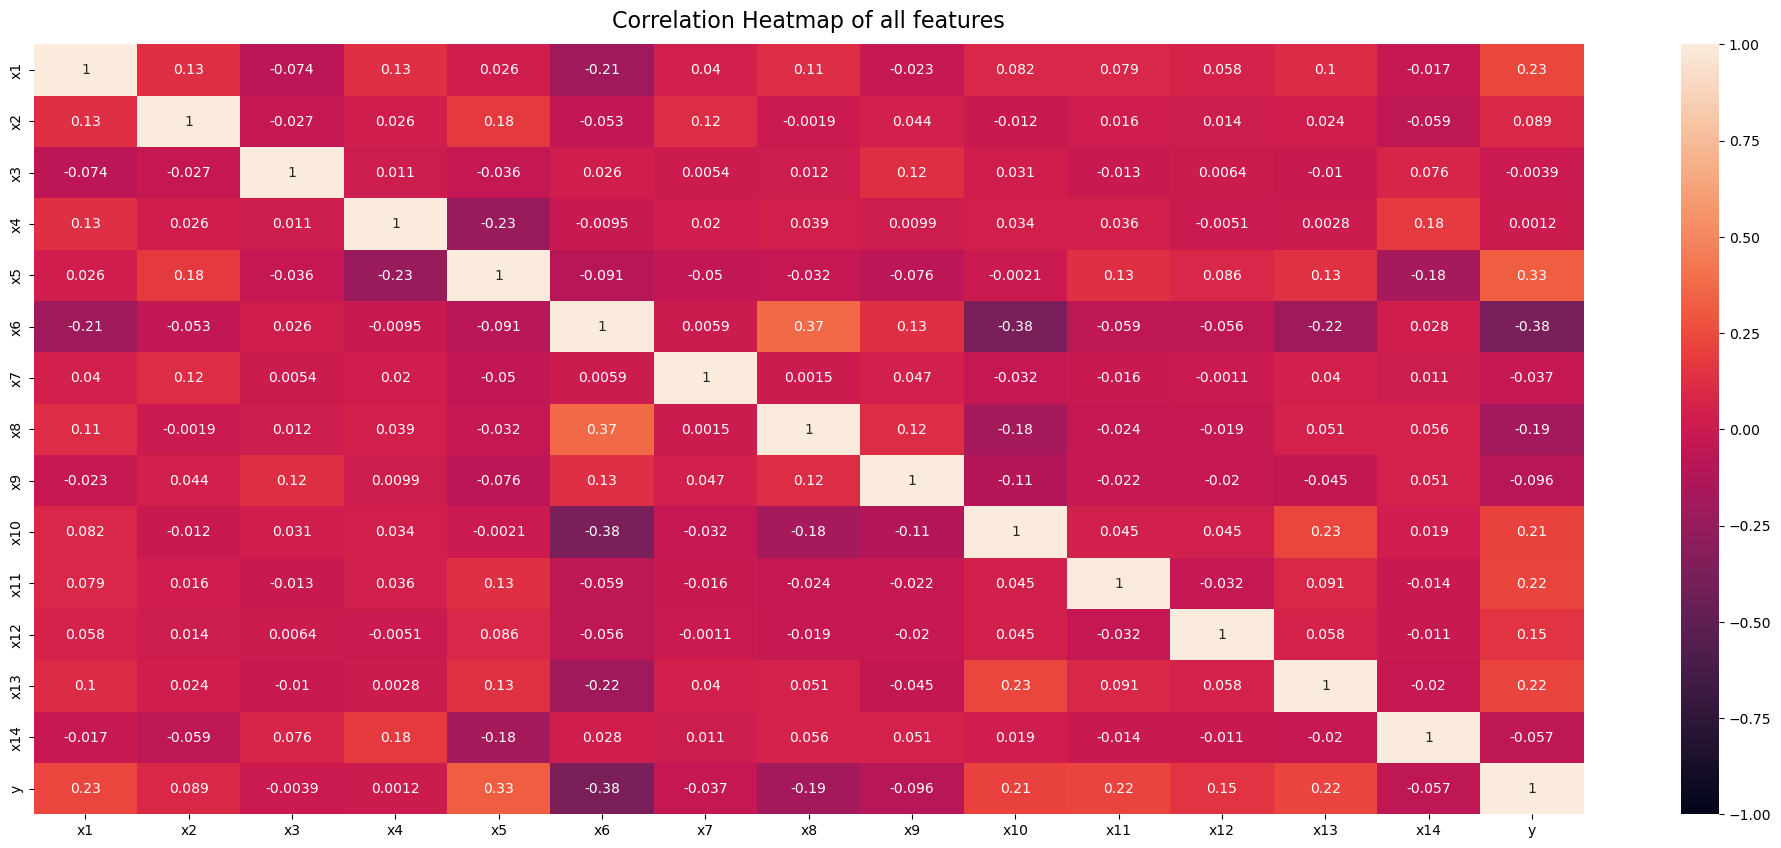

In [4]:
# Data Visualization with heat map

plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(test_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of all features', fontdict={'fontsize':16}, pad=12);

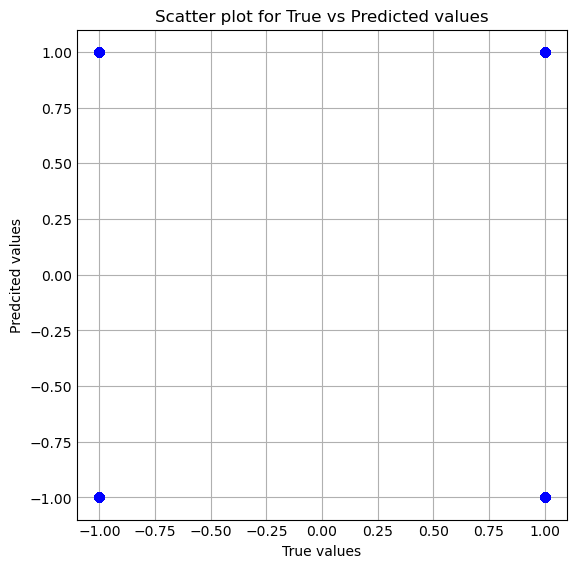

In [14]:
# Scatter plot for True vs Predicted values

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(y_test, y_pred, color="Blue")

plt.title("Scatter plot for True vs Predicted values", fontsize=12)
plt.xlabel("True values", fontsize=10)
plt.ylabel("Predcited values", fontsize=10)


plt.show()